In [43]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
url = "KDDTrain+_20Percent_Description.xlsx"
df = pd.read_excel(url)
df.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Unnamed: 41,Unnamed: 42
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [44]:
df = df.drop(columns=['Duration', 'Unnamed: 42'])
df.head()

,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Unnamed: 41
0,udp,other,SF,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,tcp,private,S0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,tcp,http,SF,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,tcp,http,SF,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,tcp,private,REJ,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [45]:
df = df.rename(columns={'Unnamed: 41' : 'Attack_Type'})
df.head()

,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Attack_Type
0,udp,other,SF,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,tcp,private,S0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,tcp,http,SF,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,tcp,http,SF,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,tcp,private,REJ,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [46]:
df.set_index('Attack_Type', inplace=True)
df

,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,...,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate
Attack_Type,,,,,,,,,,,,,,,,,,,,,
normal,udp,other,SF,146,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00
neptune,tcp,private,S0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00
normal,tcp,http,SF,232,8153,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01
normal,tcp,http,SF,199,420,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
neptune,tcp,private,REJ,0,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
neptune,tcp,exec,RSTO,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00
warezclient,tcp,ftp_data,SF,334,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00
neptune,tcp,private,REJ,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00


In [47]:
df.drop(['pod', 'guess_passwd', 'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land', 'loadmodule', 'spy'], inplace=True)
df = df.reset_index()

In [48]:
df.groupby('Attack_Type').count()

,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,...,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate
Attack_Type,,,,,,,,,,,,,,,,,,,,,
back,196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
ipsweep,710,710,710,710,710,710,710,710,710,710,...,710,710,710,710,710,710,710,710,710,710
neptune,8282,8282,8282,8282,8282,8282,8282,8282,8282,8282,...,8282,8282,8282,8282,8282,8282,8282,8282,8282,8282
nmap,301,301,301,301,301,301,301,301,301,301,...,301,301,301,301,301,301,301,301,301,301
normal,13448,13448,13448,13448,13448,13448,13448,13448,13448,13448,...,13448,13448,13448,13448,13448,13448,13448,13448,13448,13448
portsweep,587,587,587,587,587,587,587,587,587,587,...,587,587,587,587,587,587,587,587,587,587
satan,691,691,691,691,691,691,691,691,691,691,...,691,691,691,691,691,691,691,691,691,691
smurf,529,529,529,529,529,529,529,529,529,529,...,529,529,529,529,529,529,529,529,529,529
teardrop,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188


In [49]:
lista_normal = df[df['Attack_Type'] == 'normal'].index.tolist()
lista_ipsweep = df[df['Attack_Type'] == 'ipsweep'].index.tolist()
lista_neptune = df[df['Attack_Type'] == 'neptune'].index.tolist()
lista_portsweep = df[df['Attack_Type'] == 'portaweep'].index.tolist()
lista_satan = df[df['Attack_Type'] == 'satan'].index.tolist()
lista_smurf = df[df['Attack_Type'] == 'smurf'].index.tolist()

In [50]:
for i, indice in enumerate(lista_normal):
    if len(lista_normal) - 200 == i:
        break
    df.drop(indice, inplace=True)

for i, indice in enumerate(lista_ipsweep):
    if len(lista_ipsweep) - 200 == i:
        break
    df.drop(indice, inplace=True)

for i, indice in enumerate(lista_neptune):
    if len(lista_neptune) - 200 == i:
        break
    df.drop(indice, inplace=True)

for i, indice in enumerate(lista_portsweep):
    if len(lista_portsweep) - 200 == i:
        break
    df.drop(indice, inplace=True)

for i, indice in enumerate(lista_satan):
    if len(lista_satan) - 200 == i:
        break
    df.drop(indice, inplace=True)

for i, indice in enumerate(lista_smurf):
    if len(lista_smurf) - 200 == i:
        break
    df.drop(indice, inplace=True)

In [51]:
lista_normal = df[df['Attack_Type'] == 'normal'].index.tolist()
len(lista_normal)

200

In [52]:
df['Protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [53]:
df['Service'].unique()

array(['ftp_data', 'private', 'eco_i', 'netbios_dgm', 'gopher', 'other',
       'ftp', 'sql_net', 'time', 'http', 'remote_job', 'csnet_ns', 'ssh',
       'Z39_50', 'telnet', 'systat', 'iso_tsap', 'netbios_ns', 'echo',
       'bgp', 'whois', 'nntp', 'kshell', 'klogin', 'ldap', 'link', 'name',
       'ecr_i', 'exec', 'uucp_path', 'finger', 'discard', 'imap4',
       'http_443', 'netstat', 'daytime', 'pop_3', 'smtp', 'efs', 'supdup',
       'ctf', 'mtp', 'rje', 'nnsp', 'hostnames', 'netbios_ssn', 'pm_dump',
       'courier', 'uucp', 'domain_u', 'domain', 'auth', 'login', 'sunrpc',
       'vmnet', 'X11', 'IRC', 'urp_i'], dtype=object)

In [54]:
df['Flag'].unique()

array(['SF', 'REJ', 'RSTR', 'SH', 'S0', 'RSTOS0', 'S2', 'OTH', 'RSTO',
       'S1'], dtype=object)

In [55]:
df['Attack_Type'].unique()


array(['warezclient', 'portsweep', 'teardrop', 'nmap', 'back', 'smurf',
       'satan', 'ipsweep', 'neptune', 'normal'], dtype=object)

In [56]:
le = preprocessing.LabelEncoder()

le.fit(['udp', 'tcp', 'icmp'])
Protocol_type = le.transform(df['Protocol_type'])
df['Protocol_type'] = Protocol_type

le.fit(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
        'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
        'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
        'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
        'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
        'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
        'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
        'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
        'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
        'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
        'http_8001'])
Service = le.transform(df['Service'])
df['Service'] = Service

le.fit(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
        'S2', 'OTH'])
Flag = le.transform(df['Flag'])
df['Flag'] = Flag
le.fit(['normal', 'neptune', 'teardrop', 'warezclient', 'ipsweep', 'portsweep', 'nmap', 'satan', 'smurf', 'back'])
Attack_Type = le.transform(df['Attack_Type'])
df['Attack_Type'] = Attack_Type
df

,Attack_Type,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate
12,9,1,19,9,334,0,0,0,0,0,...,2,20,1.00,0.00,1.00,0.20,0.0,0.0,0.00,0.0
32,5,1,46,1,0,0,0,0,0,0,...,255,1,0.00,0.31,0.28,0.00,0.0,0.0,0.29,1.0
45,8,2,46,9,28,0,0,3,0,0,...,255,80,0.31,0.02,0.31,0.00,0.0,0.0,0.00,0.0
47,9,1,19,9,334,0,0,0,0,0,...,4,38,1.00,0.00,1.00,0.18,0.0,0.0,0.00,0.0
51,8,2,46,9,28,0,0,3,0,0,...,255,2,0.01,0.02,0.01,0.00,0.0,0.0,0.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25108,2,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.0,0.0,1.00,1.0
25109,9,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.0,0.0,0.00,0.0
25110,2,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.0,0.0,1.00,1.0
25111,2,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.0,1.0,0.00,0.0


In [57]:
x = df.drop(columns='Attack_Type')
y = df['Attack_Type']

x

,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,...,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate
12,1,19,9,334,0,0,0,0,0,0,...,2,20,1.00,0.00,1.00,0.20,0.0,0.0,0.00,0.0
32,1,46,1,0,0,0,0,0,0,0,...,255,1,0.00,0.31,0.28,0.00,0.0,0.0,0.29,1.0
45,2,46,9,28,0,0,3,0,0,0,...,255,80,0.31,0.02,0.31,0.00,0.0,0.0,0.00,0.0
47,1,19,9,334,0,0,0,0,0,0,...,4,38,1.00,0.00,1.00,0.18,0.0,0.0,0.00,0.0
51,2,46,9,28,0,0,3,0,0,0,...,255,2,0.01,0.02,0.01,0.00,0.0,0.0,0.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25108,1,16,2,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.0,0.0,1.00,1.0
25109,1,19,9,334,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.0,0.0,0.00,0.0
25110,1,46,1,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.0,0.0,1.00,1.0
25111,1,38,5,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.0,1.0,0.00,0.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(len(X_train), ' ', len(X_test), ' ', len(y_train), ' ', len(y_test))

1717   736   1717   736


In [59]:
print('Ajuste da topologia...')
num_entrada = X_train.shape[1]
num_saida = len(df['Attack_Type'].unique())
print(f'Entradas = %i \nSaídas = %i'%(num_entrada, num_saida))

while True:
    num_camada_escondida = int(input('Digite o número de camadas ocultas: '))
    if(num_camada_escondida > 0):
        break


topologia = []
for i in range(0, num_camada_escondida):
    num = int(input(f'Quantidade de neurônios na {i+1}ª camada oculta: '))
    topologia.append(num)
    while(num <= 0):
        num = int(input(f'Quantidade de neurônios na {i+1}ª camada oculta: '))
        break

epocas = int(input('Digite o número de épocas: '))

Ajuste da topologia...
Entradas = 40 
Saídas = 10


Iteration 1, loss = 2.48304857
Iteration 2, loss = 2.38288549
Iteration 3, loss = 2.30039424
Iteration 4, loss = 2.22823423
Iteration 5, loss = 2.16776432
Iteration 6, loss = 2.11486328
Iteration 7, loss = 2.07062481
Iteration 8, loss = 2.03063090
Iteration 9, loss = 1.99539809
Iteration 10, loss = 1.96515452
Iteration 11, loss = 1.93195502
Iteration 12, loss = 1.89657021
Iteration 13, loss = 1.86429785
Iteration 14, loss = 1.83166660
Iteration 15, loss = 1.80012684
Iteration 16, loss = 1.77056152
Iteration 17, loss = 1.74200019
Iteration 18, loss = 1.71134351
Iteration 19, loss = 1.68265966
Iteration 20, loss = 1.65535740
Iteration 21, loss = 1.62677583
Iteration 22, loss = 1.59380646
Iteration 23, loss = 1.56485373
Iteration 24, loss = 1.53590397
Iteration 25, loss = 1.50759155
Iteration 26, loss = 1.47569400
Iteration 27, loss = 1.43119468
Iteration 28, loss = 1.39090650
Iteration 29, loss = 1.35765151
Iteration 30, loss = 1.32793548
Iteration 31, loss = 1.30368346
Iteration 32, los

Text(0, 0.5, 'perda')

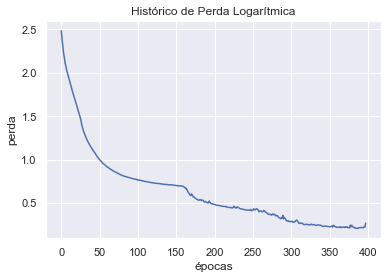

In [60]:
Modelo = MLPClassifier(hidden_layer_sizes=tuple(topologia), activation='tanh', max_iter=epocas, random_state=42, verbose=True)

topologia.insert(0, num_entrada)
topologia.append(num_saida)

modelo = Modelo.fit(X_train, y_train)

print(modelo)
print('Topologia da MLP = ', topologia)

plt.plot(modelo.loss_curve_)
plt.title('Histórico de Perda Logarítmica')
plt.xlabel('épocas')
plt.ylabel('perda')


In [61]:
teste_modelo = modelo.predict(X_test) 

In [62]:
df['Attack_Type'] = le.inverse_transform(df['Attack_Type'])
labels = df['Attack_Type'].unique()
print(labels)

['warezclient' 'portsweep' 'teardrop' 'nmap' 'back' 'smurf' 'satan'
 'ipsweep' 'neptune' 'normal']


              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.92      0.93      0.93        75
           2       0.98      1.00      0.99        50
           3       0.81      0.89      0.85        92
           4       0.85      0.76      0.80        51
           5       0.91      1.00      0.95       174
           6       1.00      0.65      0.79        72
           7       1.00      0.78      0.88        65
           8       0.86      1.00      0.93        51
           9       0.86      0.98      0.91        43

    accuracy                           0.90       736
   macro avg       0.91      0.90      0.90       736
weighted avg       0.91      0.90      0.90       736

A acurácia é 90.49%


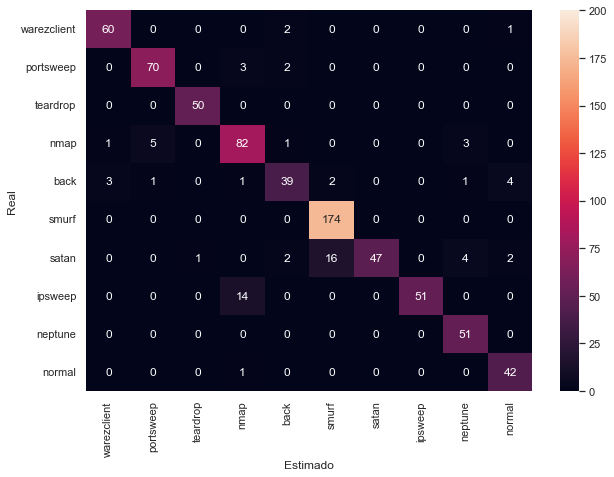

In [63]:
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, teste_modelo)
plt.figure(1, figsize=(10, 7))
sns.heatmap(mat, annot=True, vmin=0, fmt='.0f', vmax=200, xticklabels=labels, yticklabels=labels, cmap="rocket")
#sns.set(font_scale=0.5)
plt.xlabel('Estimado')
plt.ylabel('Real')

print(classification_report(y_test, teste_modelo))
acuracia = metrics.accuracy_score(teste_modelo, y_test) * 100
print('A acurácia é %.2f%%' %  acuracia)